# Project: Wrangling and Analyze Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#Je vais utiliser Request pour télécharger le fichier image_predictions.tsv
link = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(link)

with open('image-predictions.tsv', mode='wb') as file:
    file.write(r.content)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
#Vu que je n'ai pas accès à l'API de Twitter, je vais utiliser le fichier tweet-json.txt fourni par Udacity
#Je crée une liste vide, j'ouvre le fichier tweet-json.txt et je fais une boucle. Ensuite je convertis le fichier en utilisant json.loads et j'ajoute le résultat à la liste créée
json_list = []

with open('tweet-json.txt') as file:
    for line in file:
        data = json.loads(line)
        json_list.append(data)

In [5]:
json_list[0]

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'medium': {'w': 

In [6]:
#Je crée un DataFrame à partir de json_list
df_tweet_api = pd.DataFrame(json_list, columns=['id', 'retweet_count','favorite_count'])
df_tweet_api.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### 1. df_twitter_archive

In [7]:
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
#J'affiche 10 lignes aléatoires du dataframe
df_twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1873,675145476954566656,NaN,NaN,2015-12-11 02:49:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",What an honor. 3 dogs here. Blond one is clear...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675145476...,9,10,None,None,None,None,None
639,793256262322548741,NaN,NaN,2016-11-01 01:00:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh h*ck look at this spookling right here. Fri...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793256262...,12,10,None,None,None,None,None
1957,673583129559498752,NaN,NaN,2015-12-06 19:21:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sandy. She loves her spot by the tree....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673583129...,11,10,Sandy,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
1089,737800304142471168,NaN,NaN,2016-06-01 00:17:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She's ubering home after a few ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/737800304...,10,10,Bella,None,None,None,None
1040,744223424764059648,NaN,NaN,2016-06-18 17:41:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is actually a pupper and I'd pet it so we...,NaN,NaN,NaN,https://twitter.com/strange_animals/status/672...,12,10,actually,None,None,pupper,None
2224,668291999406125056,NaN,NaN,2015-11-22 04:56:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I can't do better than he did. 10/10 https://t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668291999...,10,10,None,None,None,None,None
874,761292947749015552,NaN,NaN,2016-08-04 20:09:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Bonaparte. He's pupset because it's cloud...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/761292947...,11,10,Bonaparte,None,None,None,None
1438,696900204696625153,NaN,NaN,2016-02-09 03:35:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rosie. She's a Benebark Cumberpatch. S...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/696900204...,12,10,Rosie,None,None,None,None


In [9]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
df_twitter_archive.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [11]:
#Je verifie le nombre de rating_numerator inférieurs à 10
sum(df_twitter_archive.rating_numerator < 10)

440

In [12]:
#je les affiches la liste des tweet_id ayant un rating_numerator inférieur à 10
df_twitter_archive[df_twitter_archive.rating_numerator < 10].tweet_id

45      883482846933004288
229     848212111729840128
315     835152434251116546
387     826598799820865537
462     817502432452313088
485     814578408554463233
599     798682547630837760
605     798576900688019456
730     781661882474196992
745     780092040432480260
764     777953400541634568
765     777885040357281792
784     775096608509886464
814     771014301343748096
835     768193404517830656
845     766423258543644672
859     763183847194451968
860     763167063695355904
883     760252756032651264
896     759099523532779520
906     758041019896193024
912     757596066325864448
915     757354760399941633
936     753375668877008896
946     752568224206688256
948     752334515931054080
956     751583847268179968
964     750506206503038976
966     750383411068534784
987     749036806121881602
               ...        
2312    666776908487630848
2314    666701168228331520
2315    666691418707132416
2316    666649482315059201
2317    666644823164719104
2319    666447344410484738
2

In [13]:
#Je verifie le rating_numerator d'un tweet_id
df_twitter_archive.loc[(df_twitter_archive.tweet_id == 666437273139982337), 'rating_numerator']

2320    7
Name: rating_numerator, dtype: int64

In [14]:
df_twitter_archive.rating_denominator.describe()
#JE constate qu'il y'a des rating_denominator qui ont la valeur 0

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [15]:
#Je verifie quels sont les tweet_id qui ont la valeur 0
df_twitter_archive[df_twitter_archive.rating_denominator == 0].tweet_id

313    835246439529840640
Name: tweet_id, dtype: int64

In [16]:
df_twitter_archive.loc[313, 'text']

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [17]:
#Je cherche le nombre de rating_denominator qui sont différent de 10
sum(df_twitter_archive.rating_denominator != 10)

23

In [18]:
df_twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Oliver         11
Cooper         11
Lucy           11
Tucker         10
Penny          10
Lola           10
Winston         9
Bo              9
Sadie           8
the             8
Bailey          7
Daisy           7
Toby            7
Buddy           7
an              7
Rusty           6
Milo            6
Scout           6
Koda            6
Leo             6
Jax             6
Oscar           6
Stanley         6
Dave            6
Jack            6
Bella           6
Finn            5
             ... 
Sonny           1
Harvey          1
Brian           1
Edd             1
Yoda            1
Dylan           1
Napolean        1
Cal             1
Traviss         1
Steve           1
Gunner          1
Tuck            1
Christoper      1
Brockly         1
Kollin          1
Sephie          1
Al              1
Tripp           1
Scott           1
Iroh            1
Buckley         1
life            1
light           1
Edgar           1
Pluto     

### 2. df_image_pred

In [19]:
df_image_pred = pd.read_csv('image-predictions.tsv', sep='\t')
df_image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [20]:
df_image_pred.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
461,674800520222154752,https://pbs.twimg.com/media/CV1ffl3XAAAiFyr.jpg,1,Pembroke,0.876479,True,Cardigan,0.096911,True,dingo,0.009196,False
953,705102439679201280,https://pbs.twimg.com/media/CckG63qUsAALbIr.jpg,1,collie,0.457672,True,chow,0.279101,True,Pomeranian,0.076922,True
1611,801285448605831168,https://pbs.twimg.com/media/Cx683NPUAAAjyU4.jpg,1,minivan,0.789376,False,beach_wagon,0.081125,False,convertible,0.064534,False
1424,772152991789019136,https://pbs.twimg.com/media/Crc9DEoWEAE7RLH.jpg,2,golden_retriever,0.275318,True,Irish_setter,0.100988,True,vizsla,0.073525,True
1004,708845821941387268,https://pbs.twimg.com/media/CdZTgynWwAATZcx.jpg,1,schipperke,0.745640,True,kelpie,0.167853,True,Boston_bull,0.014763,True
1164,735256018284875776,https://pbs.twimg.com/media/CjQnclkVEAA4pnK.jpg,1,Staffordshire_bullterrier,0.523191,True,French_bulldog,0.351104,True,doormat,0.028075,False
921,701981390485725185,https://pbs.twimg.com/media/Cb3wWWbWEAAy06k.jpg,1,Pomeranian,0.491022,True,weasel,0.130879,False,Yorkshire_terrier,0.099241,True
94,667550882905632768,https://pbs.twimg.com/media/CUObvUJVEAAnYPF.jpg,1,web_site,0.998258,False,dishwasher,0.000201,False,oscilloscope,0.000142,False
80,667455448082227200,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,1,Tibetan_terrier,0.676376,True,Irish_terrier,0.054933,True,Yorkshire_terrier,0.040576,True
1911,853639147608842240,https://pbs.twimg.com/media/C9i8RhhXoAAdkMT.jpg,1,German_shepherd,0.509879,True,malinois,0.237311,True,kelpie,0.046916,True


In [21]:
df_image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
df_image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### 3. df_tweet_api

In [23]:
df_tweet_api.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [24]:
df_tweet_api.sample(10)

,id,retweet_count,favorite_count
839,766864461642756096,6521,0
1738,679503373272485890,1673,3484
393,825829644528148480,2848,14025
451,818614493328580609,2982,10971
1720,680115823365742593,1028,2972
763,777953400541634568,4080,0
91,874296783580663808,4308,26651
926,754747087846248448,591,2854
76,877736472329191424,17300,71144
317,834574053763584002,2882,14993


In [25]:
df_tweet_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [26]:
df_tweet_api.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


### Quality issues
1. Il y'a des valeurs manquantes dans les colonnes in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls du DataFrame df_twitter_archive

2. Les noms de certains chiens sont invalides (None, a, an, the, etc..) dans le DataFrame df_twitter_archive

3. Timestamp n'as pas un bon type de données dans le DataFrame df_twitter_archive

4. La colonne source contient des balises html dans le DataFrame df_twitter_archive

5. L'underscore est utilisé pour remplacer les espaces dans les colonnes p1, p2 et p3 dans le DataFrame df_image_pred

6. Il y'a 23 rating_denominator qui sont différents de 10 dans le DataFrame df_twitter_archive

7. Certains mots commencent par des majuscules et d'autres des miniscules dans les colonnes p1, p2 et p3 dans le DataFrame df_image_pred

8. La colonne id contient les memes valeurs que tweet_id.

### Tidiness issues
1. Les colonnes doggo, floofler, pupper, puppo peuvent former une seule colonne

2. Toutes les données peuvent etre fusionnées pour former un seul DataFrame

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [27]:
# Make copies of original pieces of data
df_twitter_archive_clean = df_twitter_archive.copy()
df_tweet_api_clean = df_tweet_api.copy()
df_image_pred_clean = df_image_pred.copy()


### Issue #1:

Il y'a des valeurs manquantes dans les colonnes in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls du DataFrame df_twitter_archive

#### Define:

Je supprime ces différentes colonnes

#### Code

In [28]:
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean['retweeted_status_id'].isnull()]
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean['in_reply_to_status_id'].isnull()]
df_twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',  'retweeted_status_timestamp', 'expanded_urls'], axis=1, inplace=True)

#### Test

In [29]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(8)
memory usage: 196.6+ KB


### Issue #2:

Les noms de certains chiens sont invalides (None, a, an, the, etc..) dans le DataFrame df_twitter_archive

#### Define

Je convertis les nom invalides en utilisant un regex (noms commençant par une lettre miniscule ou None) en NaN et j'extrais les noms corrects de la colonne text

#### Code

In [30]:
df_twitter_archive_clean.name.replace(regex='^[a-z]+', value=np.nan, inplace=True)
df_twitter_archive_clean.name.replace(to_replace='None', value=np.nan, inplace=True)

In [31]:
sum(df_twitter_archive_clean.name.isna())

707

In [32]:
#je crée un fonction qui aura pour but d'extraire les noms qui se trouve apres le mot named dans la colonne text du dataframe
def extract_name(text):
    text_list = text.split()
    for word in text_list:
        if word.lower() == 'named':
            name_index = text_list.index(word) + 1
            return text_list[name_index]
        else:
            pass
    return np.nan

In [33]:
df_twitter_archive_clean.name = np.where(df_twitter_archive_clean.name.isna(), df_twitter_archive_clean.text.apply(extract_name), df_twitter_archive_clean.name)

#### Test

In [34]:
sum(df_twitter_archive_clean.name.isna())

684

### Issue #3:

Timestamp n'as pas un bon type de données dans le DataFrame df_twitter_archive

#### Define

je convertis en datetime

#### Code

In [35]:
df_twitter_archive_clean.timestamp = pd.to_datetime(df_twitter_archive_clean.timestamp)

#### Test

In [36]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1413 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 196.6+ KB


### Issue #4:

La colonne source contient des balises html dans le DataFrame df_twitter_archive

#### Define

J'extrais le contenu des balises html

#### Code

In [37]:
df_twitter_archive_clean.source = df_twitter_archive_clean.source.str.extract('^<a.+>(.+)</a>$')

#### Test

In [38]:
df_twitter_archive_clean.source.value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Issue #5:

L'underscore est utilisé pour remplacer les espaces dans les colonnes p1, p2 et p3 dans le DataFrame df_image_pred

#### Define

Je remplce l'underscore par un espace

#### Code

In [39]:
df_image_pred_clean.p1 = df_image_pred_clean.p1.str.replace('_', ' ')
df_image_pred_clean.p2 = df_image_pred_clean.p2.str.replace('_', ' ')
df_image_pred_clean.p3 = df_image_pred_clean.p3.str.replace('_', ' ')

#### Test

In [40]:
df_image_pred_clean.p1.sample(10)

268                 basset
1333          cash machine
25              guinea pig
84      Labrador retriever
373       Lakeland terrier
1867    Labrador retriever
138       Lakeland terrier
1937              lakeside
90       Yorkshire terrier
1589                beagle
Name: p1, dtype: object

In [41]:
df_image_pred_clean.p2.sample(10)

1025                    Dandie Dinmont
900                       Irish setter
1016                      handkerchief
88                              kuvasz
966                       bull mastiff
7                      Tibetan mastiff
1981                            briard
645                   miniature poodle
938                      window screen
1152    American Staffordshire terrier
Name: p2, dtype: object

In [42]:
df_image_pred_clean.p3.sample(10)

512             broccoli
1289    English foxhound
1705          Eskimo dog
1909    English foxhound
597                zebra
1801            grey fox
1272            sombrero
1370     theater curtain
1570          toy poodle
612             Shih-Tzu
Name: p3, dtype: object

### Issue #6:

Il y'a 23 rating_denominator qui sont différents de 10 dans le DataFrame df_twitter_archive

#### Define

Je supprime tous les rating_denominator qui sont différents de 10

#### Code

In [43]:
df_twitter_archive_clean.drop(df_twitter_archive_clean[df_twitter_archive_clean.rating_denominator != 10].index, inplace=True)

#### Test

In [44]:
sum(df_twitter_archive_clean.rating_denominator != 10)

0

### Issue #7:

Certains mots commencent par des majuscules et d'autres des miniscules dans les colonnes p1, p2 et p3 dans le DataFrame df_image_pred

#### Define

Je convertis les miniscules en majuscules

#### Code

In [45]:
df_image_pred_clean.p1 = df_image_pred_clean.p1.str.title()
df_image_pred_clean.p2 = df_image_pred_clean.p2.str.title()
df_image_pred_clean.p3 = df_image_pred_clean.p3.str.title()

#### Test

In [46]:
df_image_pred_clean.p1.head(15)

0     Welsh Springer Spaniel
1                    Redbone
2            German Shepherd
3        Rhodesian Ridgeback
4         Miniature Pinscher
5       Bernese Mountain Dog
6                 Box Turtle
7                       Chow
8              Shopping Cart
9           Miniature Poodle
10          Golden Retriever
11             Gordon Setter
12              Walker Hound
13                       Pug
14                Bloodhound
Name: p1, dtype: object

In [47]:
df_image_pred_clean.p2.head(15)

0                 Collie
1     Miniature Pinscher
2               Malinois
3                Redbone
4             Rottweiler
5       English Springer
6             Mud Turtle
7        Tibetan Mastiff
8        Shopping Basket
9               Komondor
10       Tibetan Mastiff
11     Yorkshire Terrier
12      English Foxhound
13          Bull Mastiff
14       German Shepherd
Name: p2, dtype: object

In [48]:
df_image_pred_clean.p3.head(15)

0               Shetland Sheepdog
1             Rhodesian Ridgeback
2                      Bloodhound
3              Miniature Pinscher
4                        Doberman
5      Greater Swiss Mountain Dog
6                        Terrapin
7                        Fur Coat
8                Golden Retriever
9     Soft-Coated Wheaten Terrier
10             Labrador Retriever
11                       Pekinese
12                   Ibizan Hound
13                 French Bulldog
14                       Malinois
Name: p3, dtype: object

### Issue #8:

La colonne id contient les memes valeurs que tweet_id  dans df_tweet_api.

#### Define

Je renomme la colonne en tweet_id

#### Code

In [49]:
df_tweet_api_clean.rename(columns = {'id' : 'tweet_id'}, inplace=True)

#### Test

In [50]:
df_tweet_api_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

### Issue #9:

Les colonnes doggo, floofer, pupper, puppo peuvent former une seule colonne

#### Define

Je fusionne les 4 colonnes en une seule appelé type en prenant les types dans la colonne text

#### Code

In [51]:
df_twitter_archive_clean['type'] = df_twitter_archive_clean.text.str.extract('(doggo|floofer|pupper|puppo)')

In [52]:
df_twitter_archive_clean.sample(20)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,type
2005,672272411274932228,2015-12-03 04:33:27,Twitter for iPhone,This is Pippin. He is terrified of his new lit...,11,10,Pippin,None,None,None,None,NaN
1176,719991154352222208,2016-04-12 20:50:42,Twitter for iPhone,This doggo was initially thrilled when she saw...,10,10,NaN,doggo,None,None,None,doggo
1048,743253157753532416,2016-06-16 01:25:36,Twitter for iPhone,This is Kilo. He cannot reach the snackum. Nif...,10,10,Kilo,None,None,None,puppo,puppo
2151,669682095984410625,2015-11-26 01:00:28,Twitter for iPhone,Meet Louie. He just pounded that bottle of win...,9,10,Louie,None,None,None,None,NaN
582,800388270626521089,2016-11-20 17:20:08,Twitter for iPhone,This is Doc. He takes time out of every day to...,12,10,Doc,None,floofer,None,None,floofer
1458,695074328191332352,2016-02-04 02:40:08,Twitter for iPhone,This is Lorenzo. He's educated af. Just gradua...,11,10,Lorenzo,None,None,pupper,None,pupper
825,769695466921623552,2016-08-28 00:37:54,Twitter for iPhone,This is Titan. He's trying to make friends. Of...,13,10,Titan,None,None,None,None,NaN
339,832273440279240704,2017-02-16 17:00:25,Twitter for iPhone,Say hello to Smiley. He's a blind therapy dogg...,14,10,Smiley,doggo,None,None,None,doggo
242,846153765933735936,2017-03-27 00:15:53,Twitter for iPhone,This is Vixen. He really likes bananas. Steals...,13,10,Vixen,None,None,None,None,NaN
1263,710117014656950272,2016-03-16 14:54:24,Twitter for iPhone,This pupper got her hair chalked for her birth...,11,10,NaN,None,None,pupper,None,pupper


In [53]:
#Je supprime les anciennes colonnes
df_twitter_archive_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [54]:
df_twitter_archive_clean.type.value_counts()

pupper     235
doggo       79
puppo       29
floofer      4
Name: type, dtype: int64

### Issue #10:

Toutes les données peuvent etre fusionnées pour former un seul DataFrame

#### Define

Je fusionne tous les DataFrames

#### Code

In [55]:
#Je fusionnes df_twitter_archive et df_image_pred
df_twitter_archive_clean = pd.merge(df_twitter_archive_clean, df_image_pred_clean, on='tweet_id', how='left')
#Je fusionnes df_twitter_archive et df_tweet_api
df_twitter_archive_clean = pd.merge(df_twitter_archive_clean, df_tweet_api_clean, on='tweet_id', how='left')

#### Test

In [56]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 2079
Data columns (total 21 columns):
tweet_id              2080 non-null int64
timestamp             2080 non-null datetime64[ns]
source                2080 non-null object
text                  2080 non-null object
rating_numerator      2080 non-null int64
rating_denominator    2080 non-null int64
name                  1410 non-null object
type                  347 non-null object
jpg_url               1954 non-null object
img_num               1954 non-null float64
p1                    1954 non-null object
p1_conf               1954 non-null float64
p1_dog                1954 non-null object
p2                    1954 non-null object
p2_conf               1954 non-null float64
p2_dog                1954 non-null object
p3                    1954 non-null object
p3_conf               1954 non-null float64
p3_dog                1954 non-null object
retweet_count         2080 non-null int64
favorite_count        2080

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [57]:
#J'utilise to_csv pour enregistrer le dataframe final dans un fichier twitter_archive_master.csv
df_twitter_archive_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Pourcentage de type de chiens

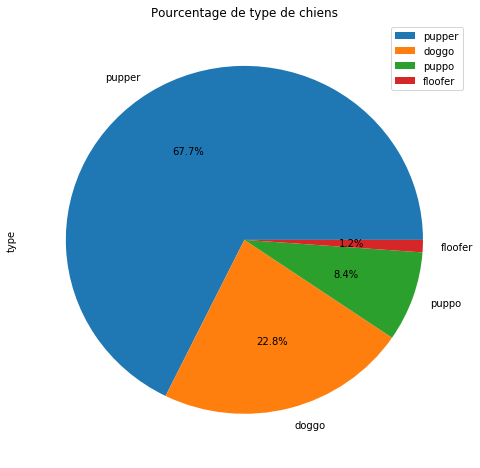

In [58]:
df_twitter_archive_clean['type'].value_counts().plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%');
plt.title('Pourcentage de type de chiens')
plt.legend()

### Insights:
1. Pupper est le type de chien le plus populaire

2. Floofer est le type de chien le moins populaire

### Moyenne de favorite_count par type de chiens

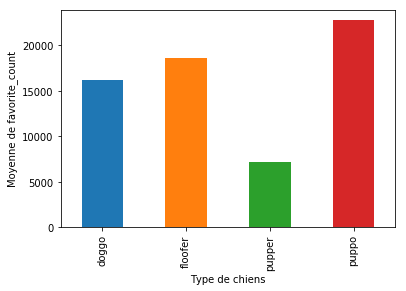

In [59]:
df_twitter_archive_clean.groupby('type').favorite_count.mean().plot(kind='bar')
plt.xlabel('Type de chiens')
plt.ylabel('Moyenne de favorite_count');

### Insights:
1. Puppo a la moyenne de favorite_count la plus grande suivi de Floofer
2. Pupper a la moyenne de favorite_count la moins grande

### Pourcentage de type de sources

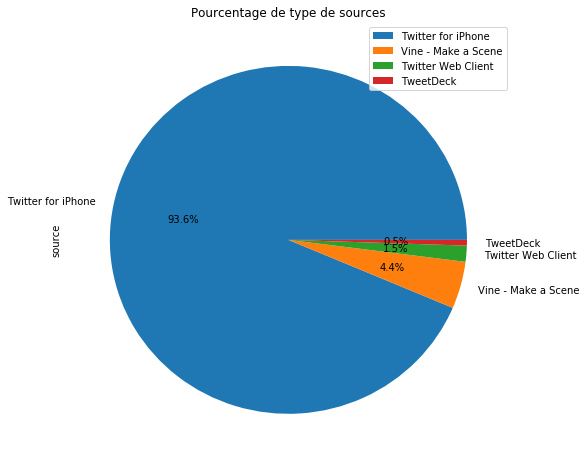

In [60]:
df_twitter_archive_clean['source'].value_counts().plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%');
plt.title('Pourcentage de type de sources')
plt.legend()

### Insights:
1. Twitter for iPhone est la source utilisée la plus utilisée
2. TweetDeck est la source utilisée la moins utilisée